##### Download MNIST images of handwritten digits

In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

# Download data
from src.data.mnist.load_mnist_data import load_mnist_data
(x_train, y_train), (x_test, y_test) = load_mnist_data()

##### Load many precalculated models with different betas to choose the best beta

----------------
beta 1e-14
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_1e-14
----------------



c:\Users\alexi\Documents\All\ETH_UZH\MasterThesis\_MT_Vol_cube\code_my\autoencoder_library\venv\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 62 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


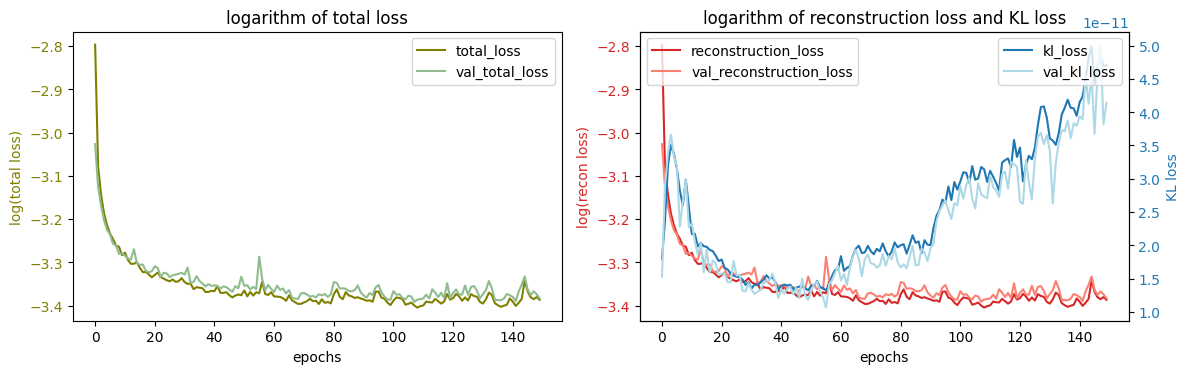

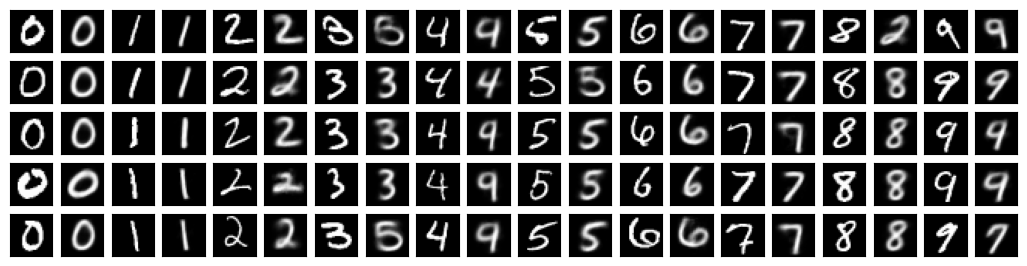

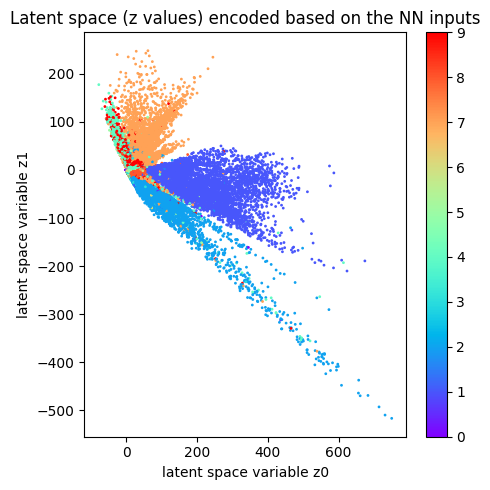

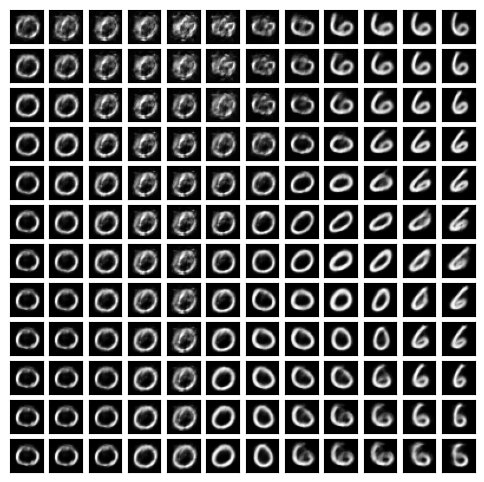

----------------
beta 1e-12
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_1e-12
----------------


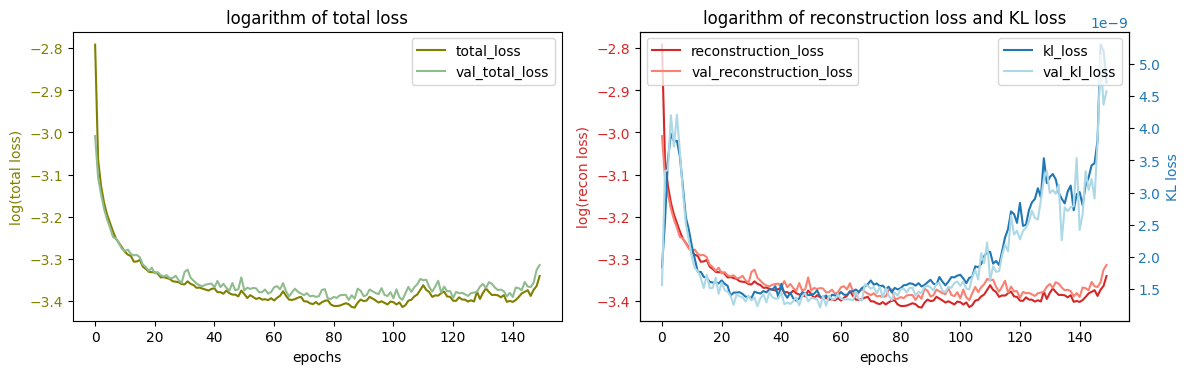

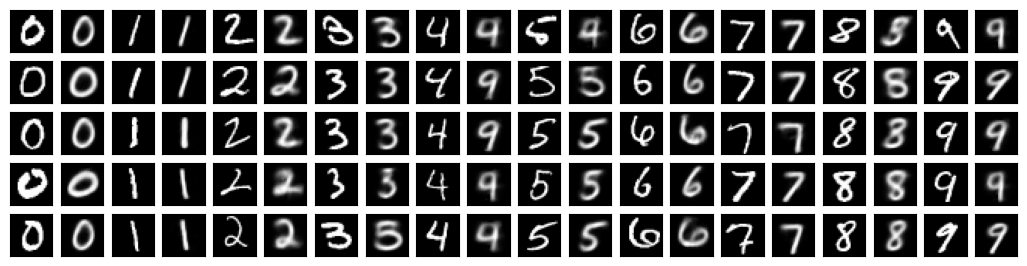

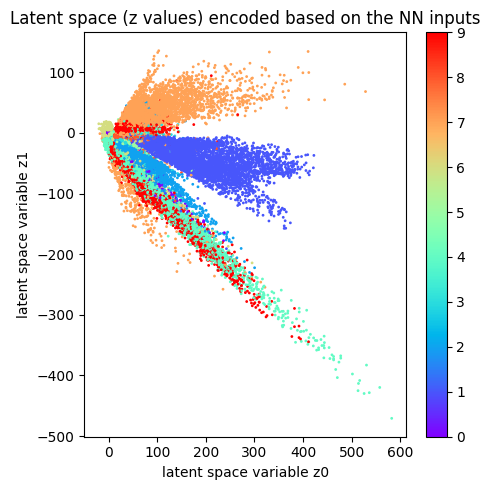

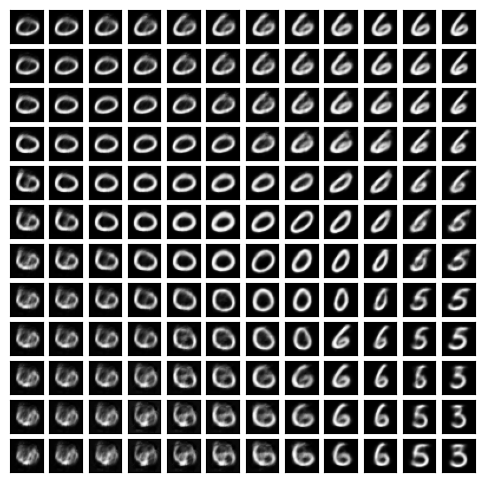

----------------
beta 1e-10
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_1e-10
----------------


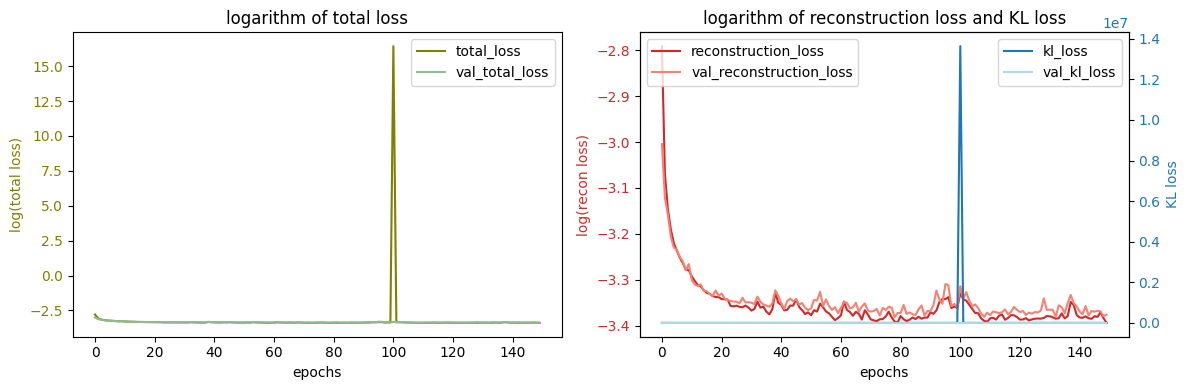

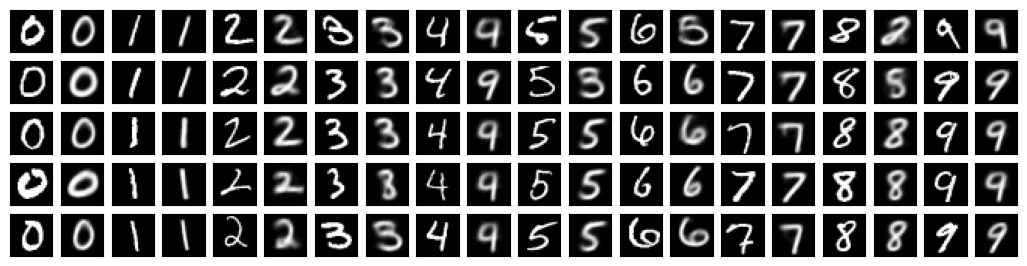

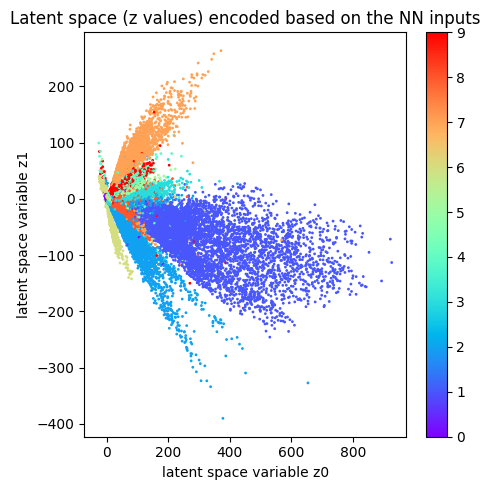

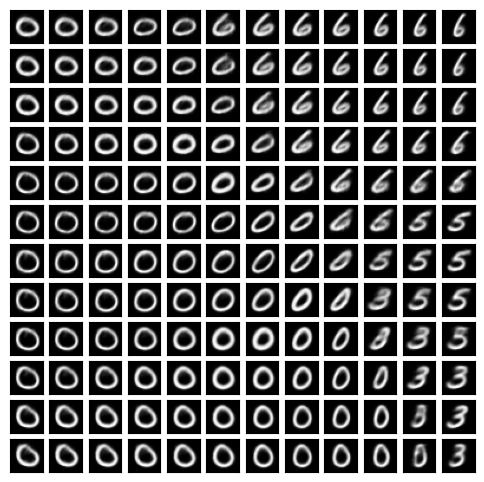

----------------
beta 1e-08
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_1e-08
----------------


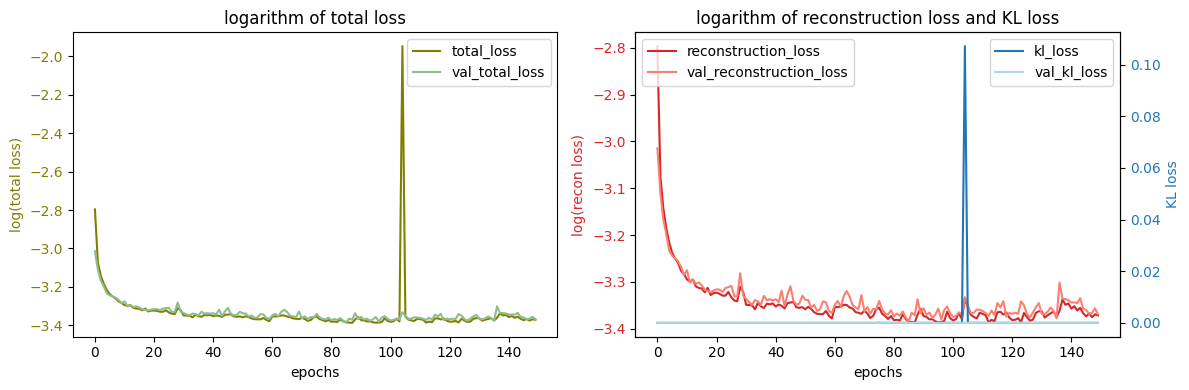

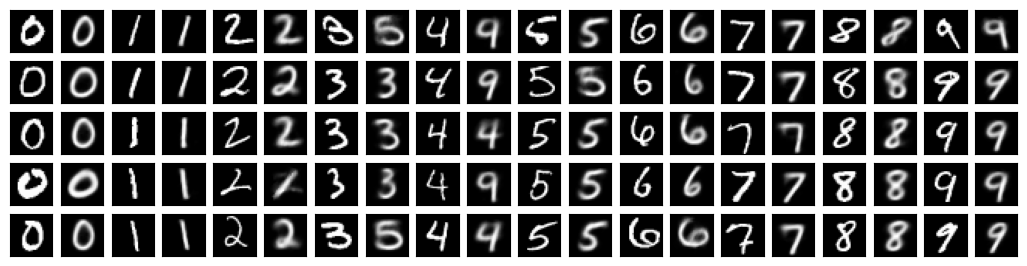

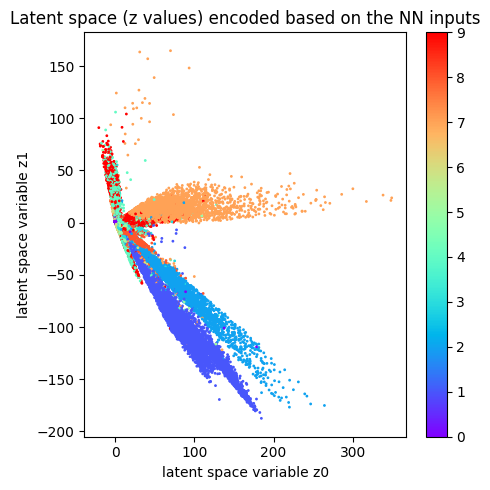

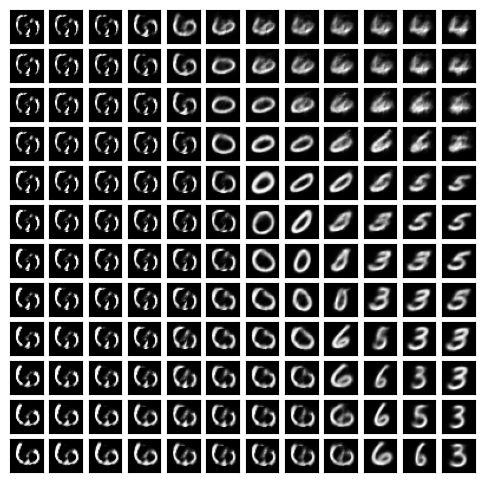

----------------
beta 1e-06
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_1e-06
----------------


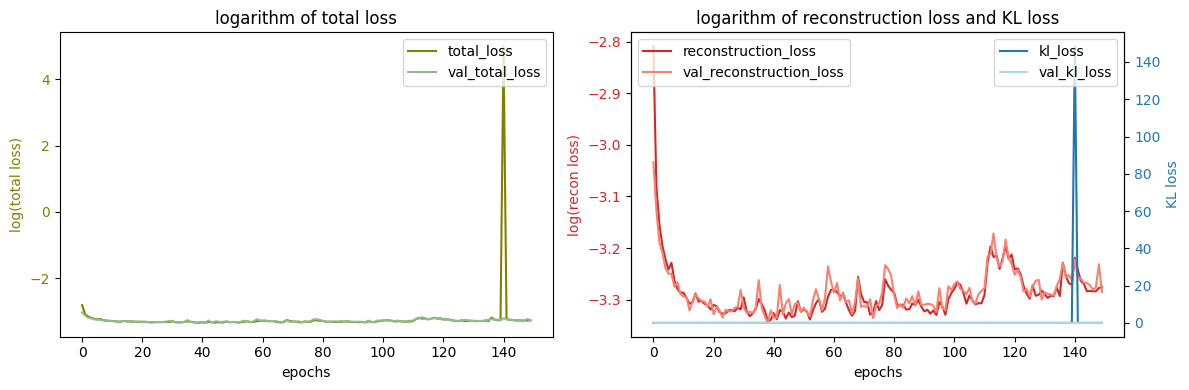

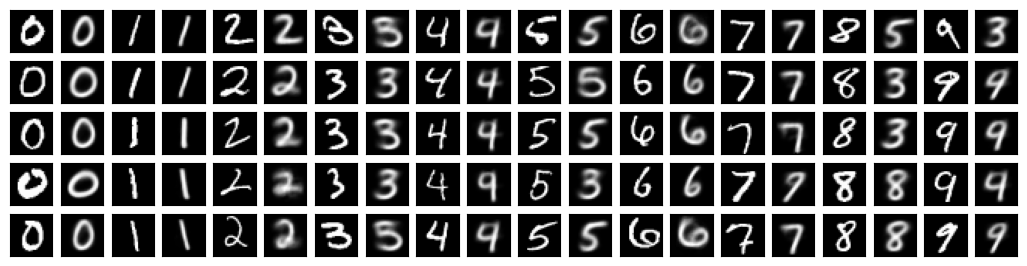

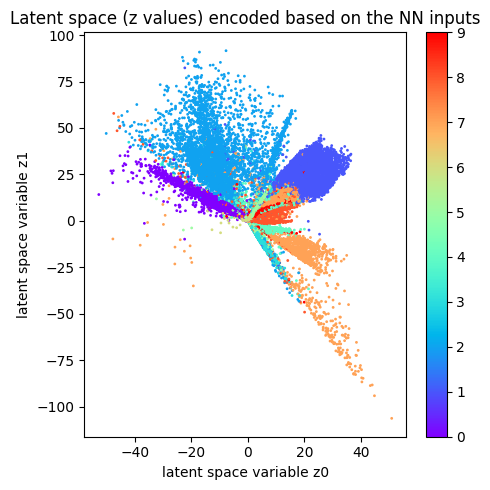

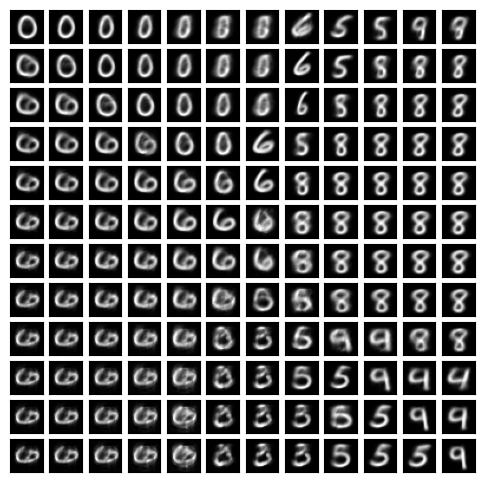

----------------
beta 0.0001
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_0.0001
----------------


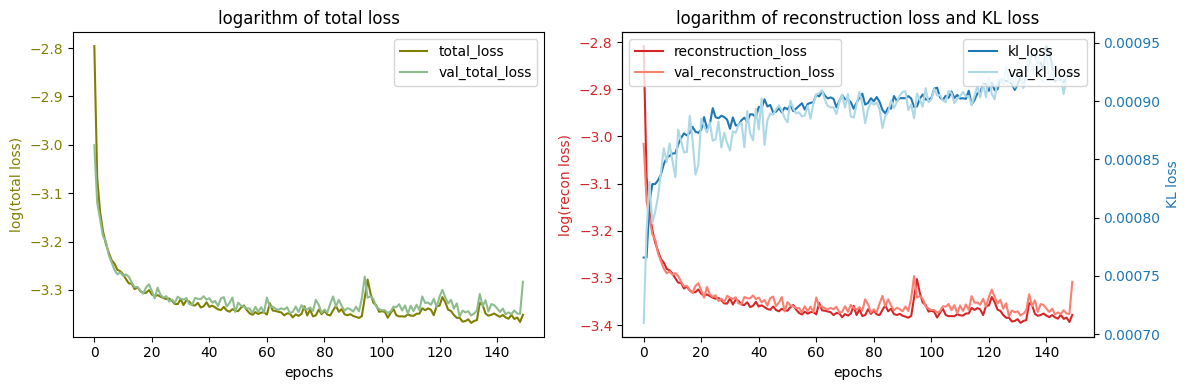

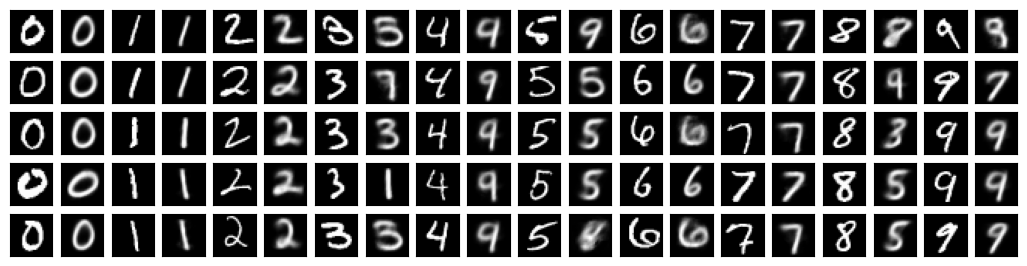

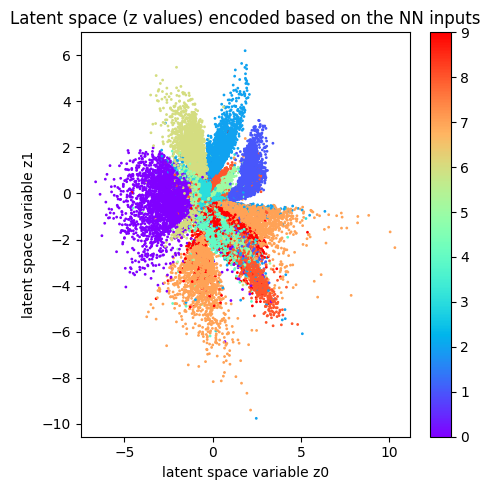

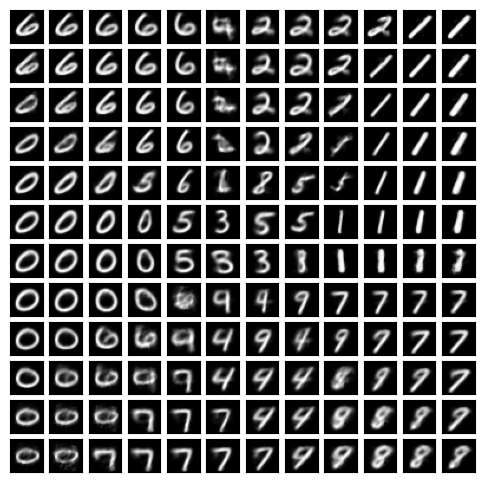

----------------
beta 0.01
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_0.01
----------------


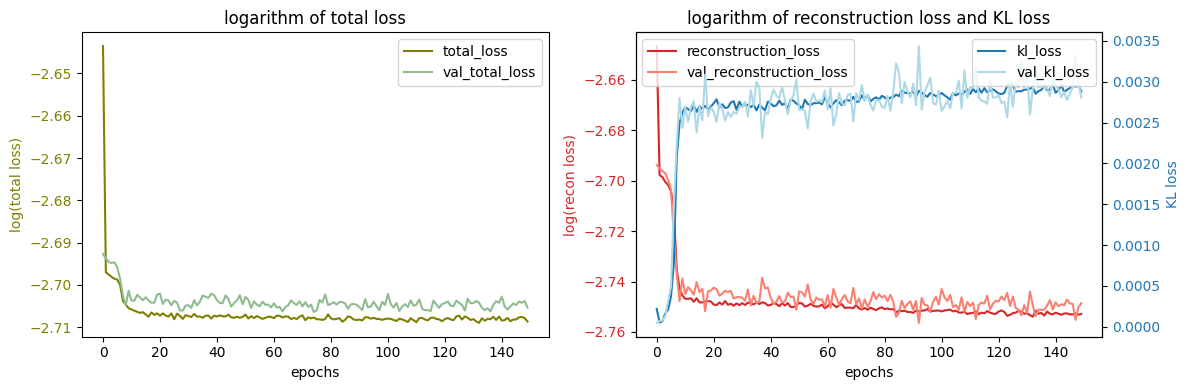

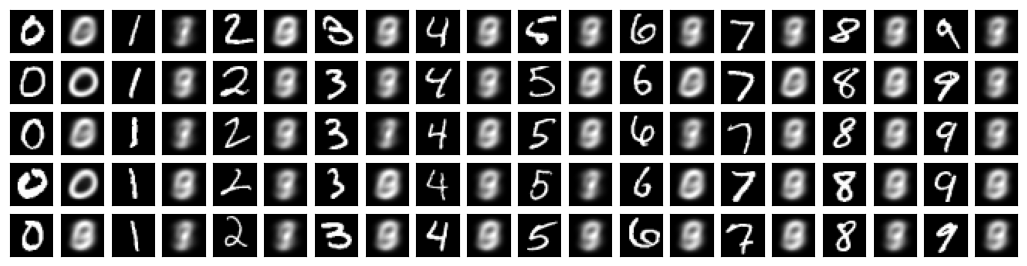

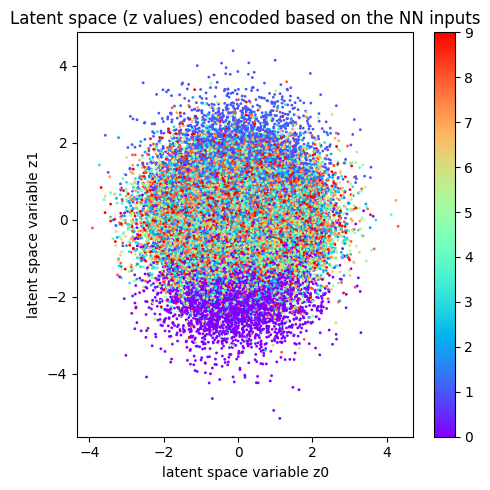

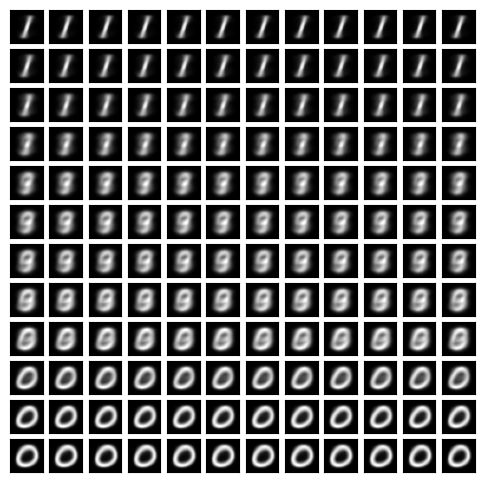

----------------
beta 1
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_1
----------------


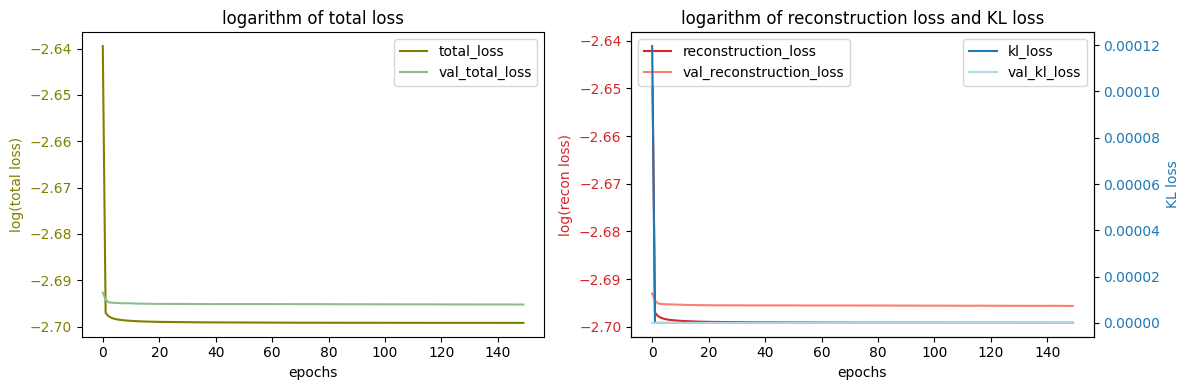

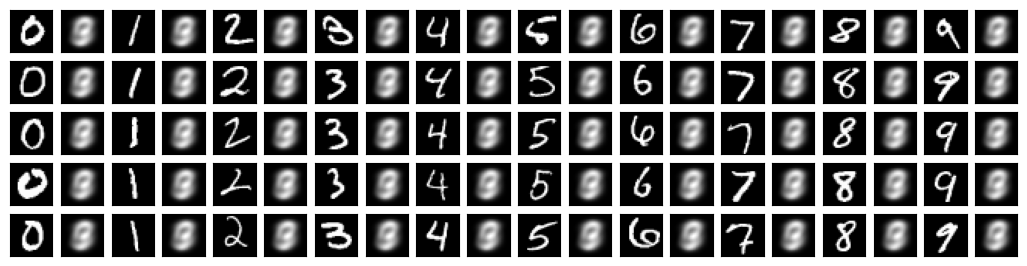

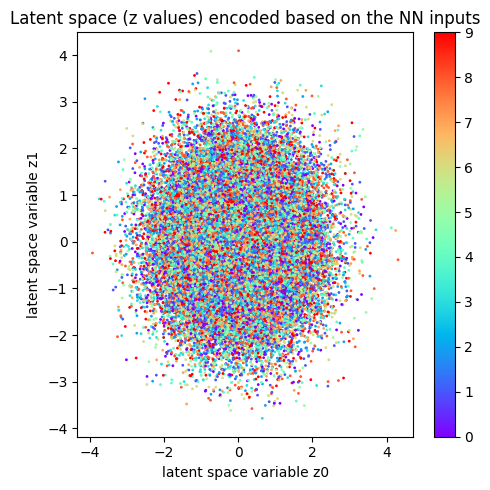

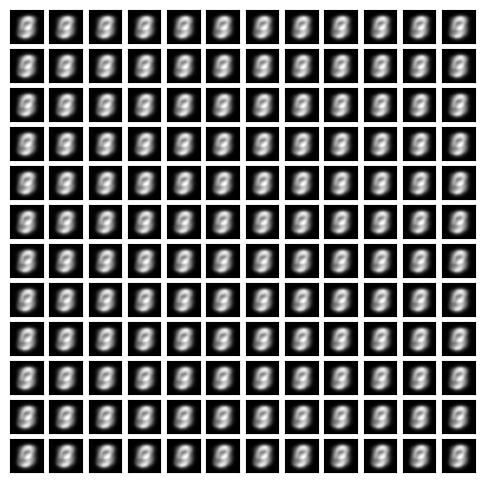

----------------
beta 100.0
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_100.0
----------------


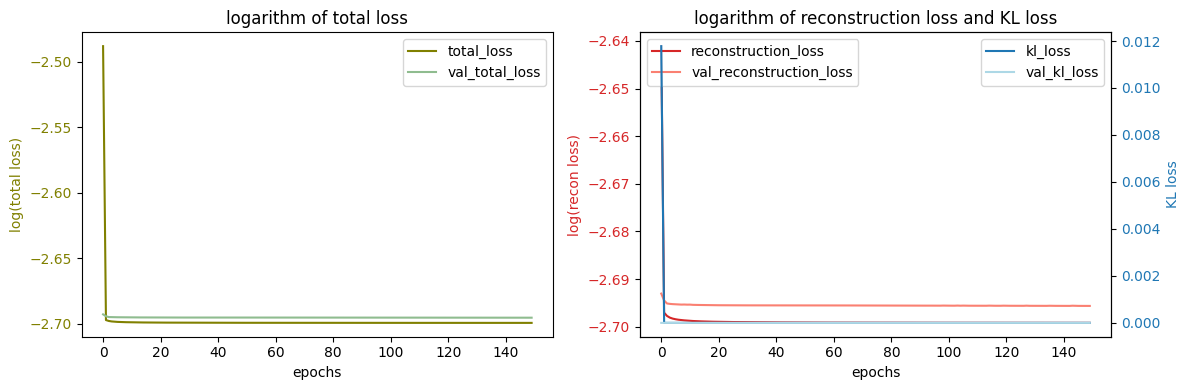

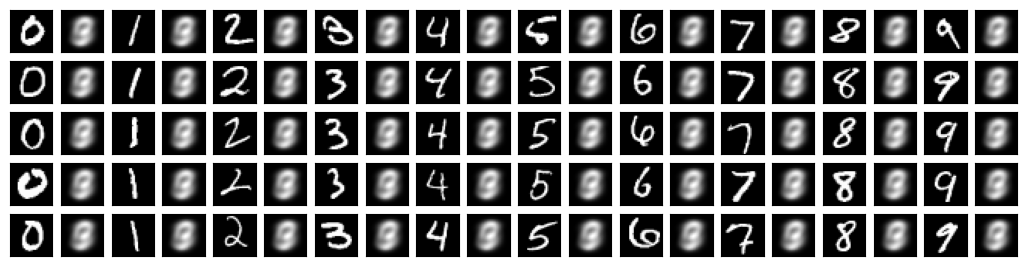

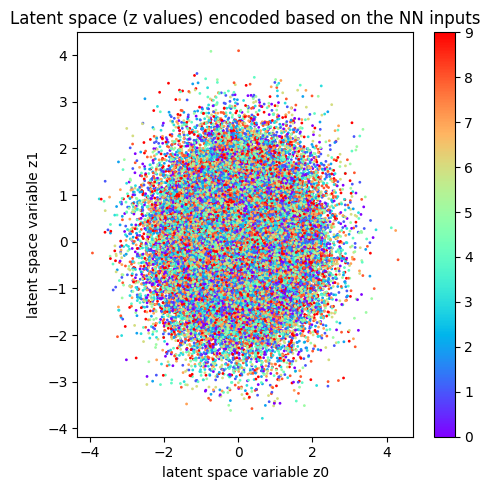

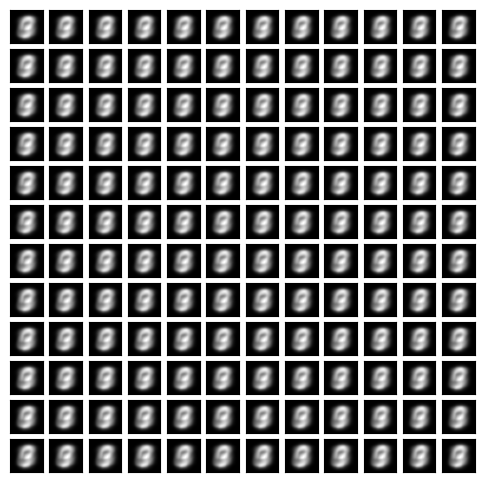

----------------
beta 10000.0
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_10000.0
----------------


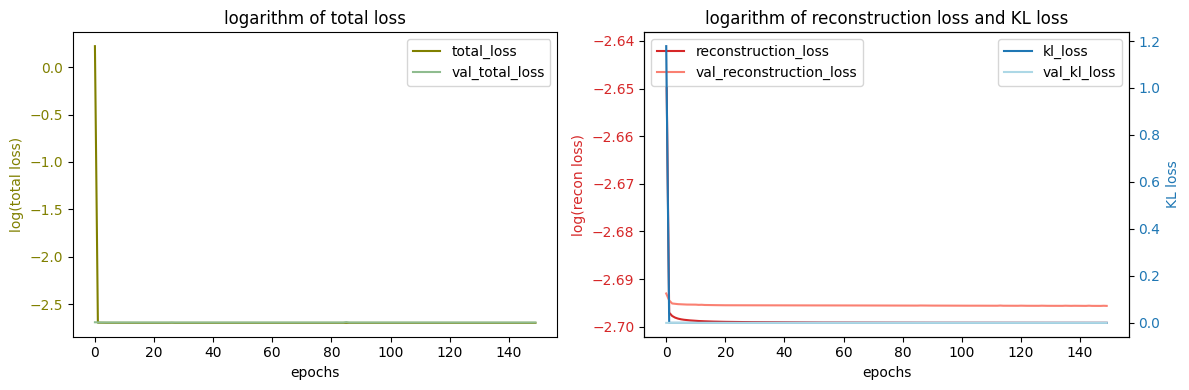

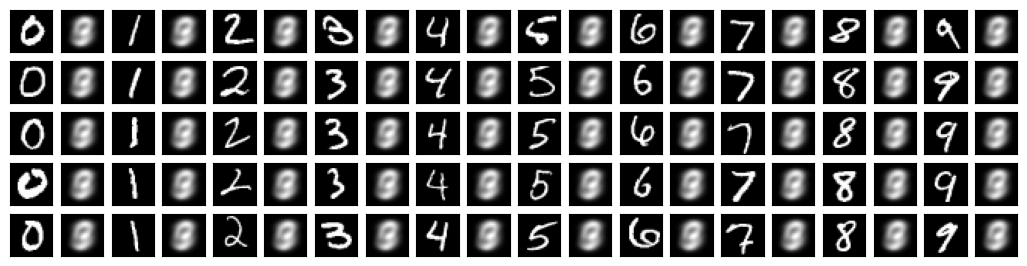

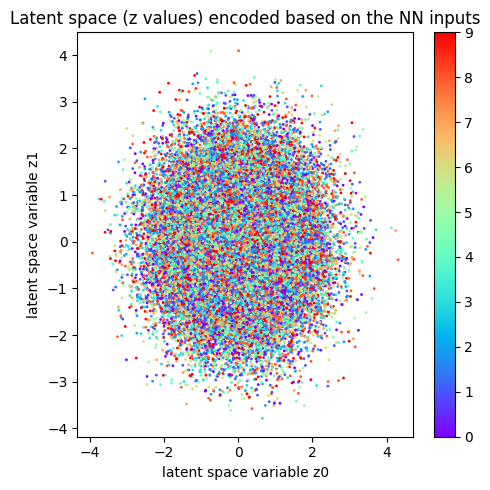

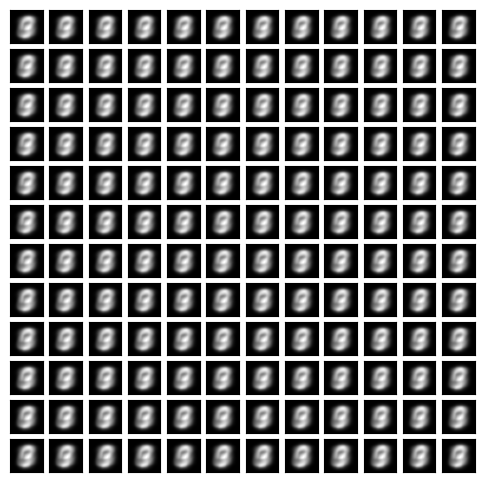

----------------
beta 1000000.0
--------------------
vae_van_mnist_2latd_150ep_bat64_mse_192_96_48_24_12_6_1000000.0
----------------


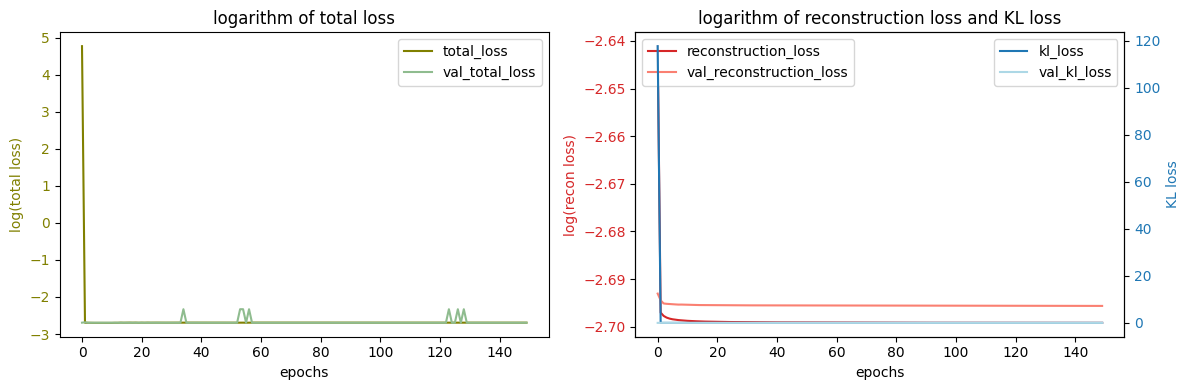

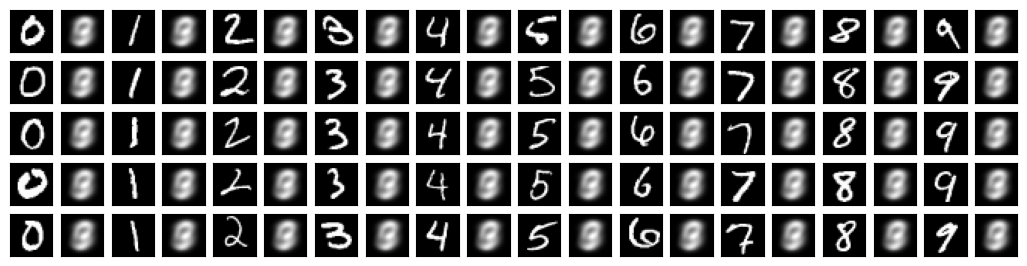

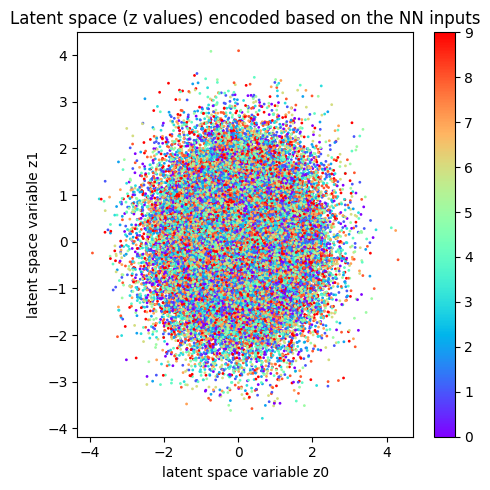

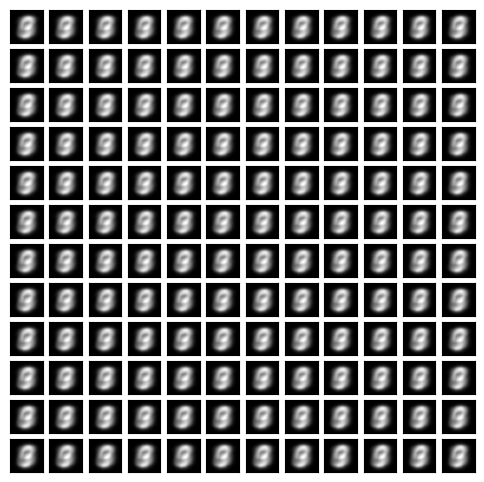

In [2]:
from src.utils.load_model_and_history import load_model_and_history
from src.visualization.plot_history_of_losses import plot_history_of_losses
from src.visualization.mnist.plot_true_vs_prediction_images import plot_true_vs_prediction_images
from src.visualization.scatplot_latent_space_2d_values import scatplot_latent_space_2d_values
from src.visualization.mnist.plot_predictions_from_2d_latent_space import plot_predictions_from_2d_latent_space

BETAS = [1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 1e2, 1e4, 1e6] # initial guess
# BETAS = [0.00008, 0.00009, 0.0001, 0.00011, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002]  # for mse 0.00013 optimal

EPOCHS = 150
BATCH_SIZE = 64
LOSS_TYPE = 'mse'
HIDDEN_LAYERS_NODES = [192, 96, 48, 24, 12, 6]

for i, beta in enumerate(BETAS):
    print('----------------')
    print('beta', beta)
    print('--------------------')
    NAME = 'vae_van_mnist_2latd_' + str(EPOCHS) + 'ep_bat' + str(BATCH_SIZE) +'_' + LOSS_TYPE + '_'
    for i, nodes in enumerate(HIDDEN_LAYERS_NODES):
        NAME += str(nodes) + '_'
    NAME += str(beta)
    print(NAME)
    print('----------------')
    
    # Load VAE
    vae, history = load_model_and_history(NAME,
                                          data_type='mnist')
    plot_history_of_losses(history)
    plot_true_vs_prediction_images(vae, 
                                   x_test,
                                   y_test)
    scatplot_latent_space_2d_values(vae,
                                    x_train,
                                    y_train)
    plot_predictions_from_2d_latent_space(vae,
                                          n_cols=12,
                                          xmin=-3,
                                          xmax=3,
                                          ymin=-3,
                                          ymax=3
                                          )